# 회귀

회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.

여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다.

머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.

회귀 계수에 따라
+ 선형 회귀
+ 비선형 회귀

독립변수 개수에 따라
+ 단일 회귀
+ 다중 회귀

## 선형 회귀

+ 일반 선형 회귀: 규제를 적용하지 않은 모델
+ 릿지 Ridge: L2 규제 추가. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
+ 라쏘 Lasso: L1 규제 추가. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 예측 시 피처가 선택되지 않게 하는 것.
+ 엘라스틱넷 Elastic Net: L2, L1 규제를 함께 결합한 모델. 피처 개수를 줄임과 동시에 계수 값의 크기를 조정함.
+ 로지스틱 회귀 Logistic Regression: 분류에 사용되는 선형 모델. 이진 분류, 희소 영역의 분류 등에서 뛰어난 예측 성능을 보임.

### 단순 선형 회귀

독립변수 한 개. 종속변수 한 개.

$$ RSS(\omega_0,\omega_1) = \frac{1}{N} \sum_{i=1}^N(y_i-(\omega_0 + \omega_1 * x_i))^2 $$

### 경사 하강법

점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

$ R(\omega) = \frac{1}{N} \sum_{i=1}^N(y_i-(\omega_0 + \omega_1 * x_i))^2 $

$R(\omega)$는 두 개의 $\omega$ 파라미터를 가지고 있기 때문에 각 변수에 편미분을 적용한다.

$$ \frac{\partial R(\omega)}{\partial \omega_1} =  \frac{2}{N} \sum_{i=1}^N -x_t*(y_i-(\omega_0+\omega_1x_i)) = -\frac{2}{N}\sum_{i=1}^N x_i*(실제값_i-예측값_i) $$

$$ \frac{\partial R(\omega)}{\partial \omega_0} =  \frac{2}{N} \sum_{i=1}^N -(y_i-(\omega_0+\omega_1x_i)) = -\frac{2}{N}\sum_{i=1}^N (실제값_i-예측값_i) $$

각 편미분 값을 보정하면서 $\omega_1, \omega_0$ 값을 업데이트하여 비용 함수 $R(\omega)$가 최소가 되는 $\omega_1, \omega_0$ 값을 구한다.

$\omega_1=이전 \omega_1+\eta\frac{2}{N}\sum_{i=1}^N x_i*(실제값_i-예측값_i) $

### 다항 회귀

회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

회귀에서 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하기 때문에 다항 회귀는 선형 회귀이다.

### 편향 분산 트레이드 오프

+ 고편향 high bias: 지나치게 한 방향성으로 치우침. -> 과소적합
+ 고분산 high variance: 지나치게 높은 변동성을 가짐. -> 과적합

편향을 낮추고 분산을 높이면서 전체 오류가 낮아지는 골디락스 지점을 통과하면, 다시 분산이 높아지고 전체 오류 값이 증가하게 됨.

## 규제 선형 모델
회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.

비용함수는 학습 데이터의 RSS 최소화 방법(잔차 오류 값을 최소로 하는)과 회귀 계수 값이 커지지 않도록 하는 방법(과적합 방지를 위한)이 서로 균형을 이뤄야 한다.

비용함수 목표 = $Min(RRS(W) + alpha*||W||_2^2)$

alpha: 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터

alpha 값을 크게 하면 배용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며,

alpha 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.

+ 릿지: L2 규제. $alpha*||W||_2^2$
+ 라쏘: L1 규제. $alpha*||W||_1$
+ 엘라스틱넷: $alpha2*||W||_2^2 + alpha1*||W||_1$

릿지와 다르게 라쏘는 일부 피처의 회귀 계수를 0으로 만들어 회귀 식에서 제외시키면서 피처 선택의 효과를 얻을 수 있다.

엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다.

엘라스틱넷의 주요 생성 파라미터
+ alpha: $alpha1+alpha2$
+ l1_ratio: $\frac{alpha1}{alpha1+alpha2}$

### 로지스틱 회귀
선형 회귀 방식을 분류에 적용한 알고리즘

로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 시그모이드 함수 최적선을 찾고,

이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것이다.

## 회귀 트리

트리를 기반으로 하는 회귀 방식

리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.

선형 회귀는 직선으로 예측 회귀선을 표현하는 데 반해,

회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다.

## 자전거 대여 수요 예측

### 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


10886개의 레코드와 12개의 칼럼으로 구성되어 있다.

In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


null 데이터는 존재하지 않으며, datetime 칼럼만 object형이고 나머지는 모두 숫자형이다.

In [4]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [5]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

년, 월, 일, 시간 칼럼을 추출하였고 datetime 칼럼은 삭제하였다.

대여 횟수인 count는 count=casual+registered 이므로 상관도가 높아 예측 저해의 우려가 있으므로 casual과 registered 칼럼을 삭제하였다.

주요 칼럼별로 target 값인 count가 어떻게 분포되어 있는지 시각화하여 살펴본다.

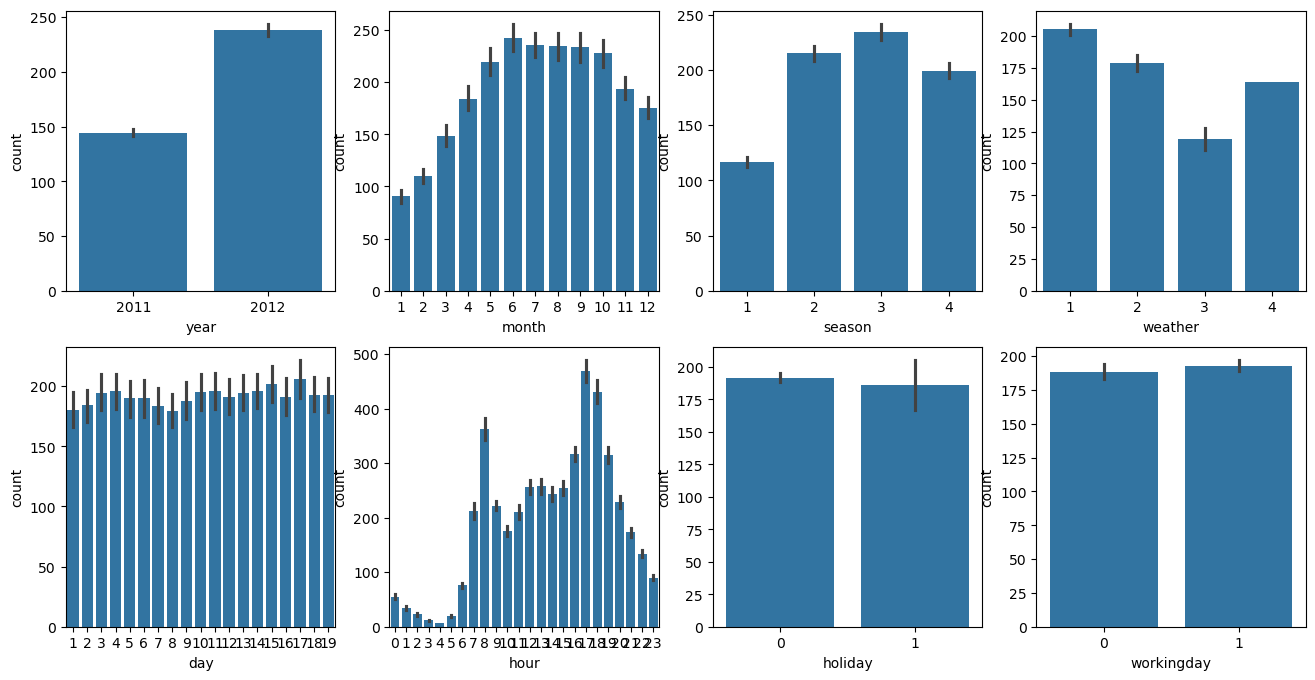

In [22]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2);
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])
plt.show()

+ year: 2012년이 2011년보다 상대적으로 높으나 단지 시간에 다른 대여 횟수 증가로 보임.
+ month, season: 봄, 겨울이 낮고 여름, 가을이 높다.
+ weather: 눈, 비가 있는 경우 낮고 맑거나 약간 안개가 있는 경우 높다.
+ hour: 출퇴근 시간이 상대적으로 높다.
+ day, holiday, workingday: 차이가 크지 않으나 주중일 경우가 상대적으로 약간 높다.

캐글에서 RMSLE root mean sqaure log error를 요구하나 사이킷런에는 없으므로 직접 만들어 사용한다.

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

log()보다는 log1p()를 사용하여 오버플로/언더풀로 오류 발생 문제를 해결한다.

### 모델 예측

회귀 모델 적용 전
+ 결과값이 정규 분포인지
+ 카테고리형 회귀 모델의 경우 원핫 인코딩으로 피처 인코딩이 되어 있는지 확인한다.

In [17]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [19]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


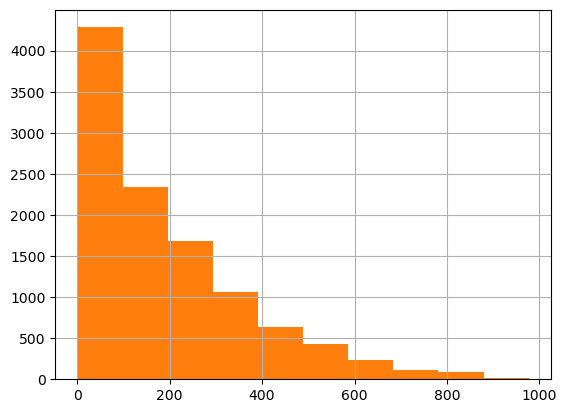

In [24]:
y_target.hist()
plt.show()

count 값이 정규 분포가 아님을 확인할 수 있다. 로그를 적용해 변환한다.

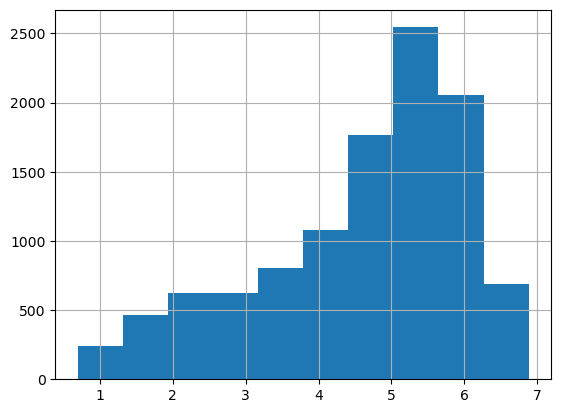

In [25]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()
plt.show()

이제 다시 학습한 후 평가를 수행한다.

In [26]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


RMSLE 오류는 줄어들었으나 RMSE 오류는 증가하였다.

개별 피처들에게 인코딩을 적용해보기 위해 각 피처의 회귀 계숫값을 시각화해본다.

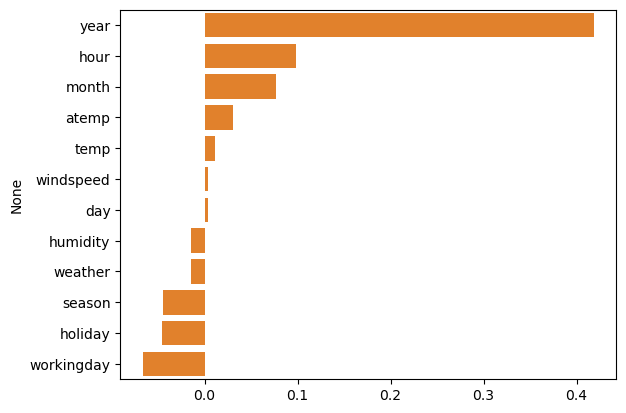

In [28]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')
plt.show()

회귀 계수 영향도가 높은 피처들을 살펴보면 year는 2011, 2012 값으로, month는 1,2,3,,, 같이 숫자값 형태로 있다.

개별 숫자값의 크기가 의미가 있는 것은 아니므로 모두 카테고리형 피처이다. 따라서 이러한 피처 인코딩에 원핫 인코딩을 적용하여 변환한다.

In [54]:
# 그런 다음 OneHotEncoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                                     'workingday','season','weather'])

In [45]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


인코딩 적용 후 예측 성능이 향상된 것을 확인할 수 있다.

다시 회귀 계수 상위 20개 피처를 추출하여 시각화 해본다.

In [57]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)
coef_sort

month_9      1.137628e+10
month_8      1.137628e+10
month_7      1.137628e+10
hour_17      8.867476e+08
hour_18      8.867476e+08
                 ...     
season_2    -1.043168e+10
season_1    -1.045484e+10
season_3    -2.294403e+10
year_2012   -4.146862e+10
year_2011   -4.146862e+10
Length: 73, dtype: float64

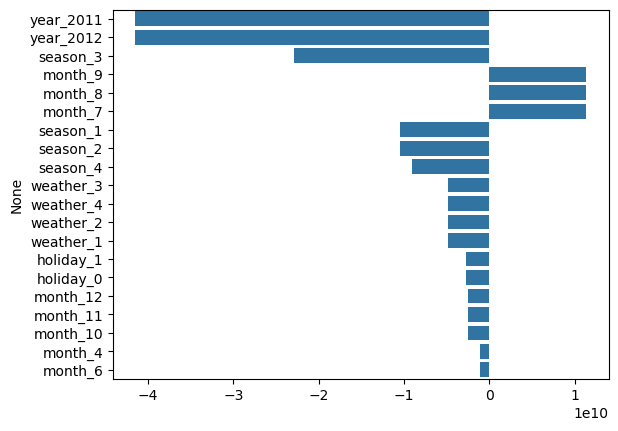

In [58]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.reindex(coef.abs().sort_values(ascending=False).index[:20])
sns.barplot(x=coef_sort.values , y=coef_sort.index)
plt.show()